<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      58560 non-null  object 
 1   Country_code       58316 non-null  object 
 2   Country            58560 non-null  object 
 3   Continent          58560 non-null  object 
 4   WHO_region         54168 non-null  object 
 5   New_cases          39260 non-null  float64
 6   Cumulative_cases   58560 non-null  int64  
 7   New_deaths         25084 non-null  float64
 8   Cumulative_deaths  58560 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 4.0+ MB


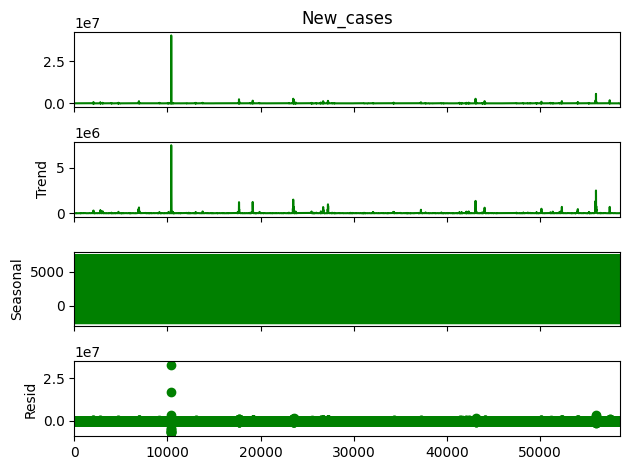

Mean Squared Error: 16467518617.385868


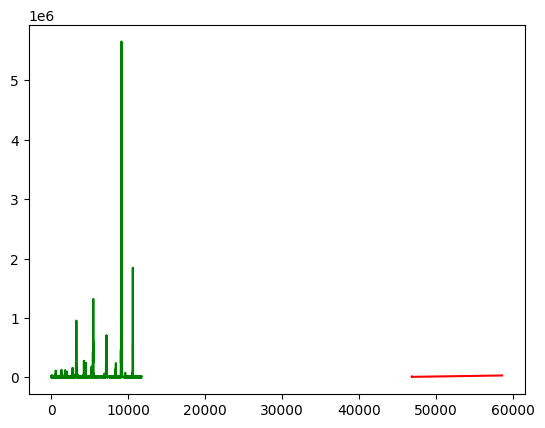

In [3]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose # Import the missing module
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Remove the leading space in the file path
df = pd.read_csv('/content/WHO COVID-19 cases.csv')

# Display the first few rows
df.head()

# Get information about the dataset
df.info()

# Generate descriptive statistics
df.describe()

# Fill missing values (if any)
df['New_cases'] = df['New_cases'].fillna(df['New_cases'].mean())

# Assuming 'df' is your DataFrame and 'New_cases' is the column with your time series data
result = seasonal_decompose(df['New_cases'], model='additive', period=12)  # or model='multiplicative'

# Access the components
result.trend
result.seasonal
result.resid

# Plot the decomposed components
fig = result.plot()
# Access the axes of the figure
ax = fig.axes
# Set the color of the lines in each subplot
for x in ax:
  for line in x.get_lines():
    line.set_color('green')
plt.show()

# Create seasonal differencing
df['New_cases_diff'] = df['New_cases'].diff(periods=12)  # Assuming monthly seasonality

train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Specify SARIMAX parameters (adjust based on EDA and model diagnostics)
model = SARIMAX(train_data['New_cases_diff'], order=(5,1,0), seasonal_order=(1,0,1,12))

# Fit the model
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Invert the differencing (if applicable)
predictions = predictions.cumsum() + train_data['New_cases'].iloc[-1]

# Calculate mean squared error
mse = mean_squared_error(test_data['New_cases'], predictions)
print("Mean Squared Error:", mse)

# Visualize actual vs. predicted values
plt.plot(np.arange(len(test_data)), test_data['New_cases'], color='green') # Access the 'New_cases' column of the DataFrame
plt.plot(predictions, color='red')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      58560 non-null  object 
 1   Country_code       58316 non-null  object 
 2   Country            58560 non-null  object 
 3   Continent          58560 non-null  object 
 4   WHO_region         54168 non-null  object 
 5   New_cases          39260 non-null  float64
 6   Cumulative_cases   58560 non-null  int64  
 7   New_deaths         25084 non-null  float64
 8   Cumulative_deaths  58560 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 4.0+ MB


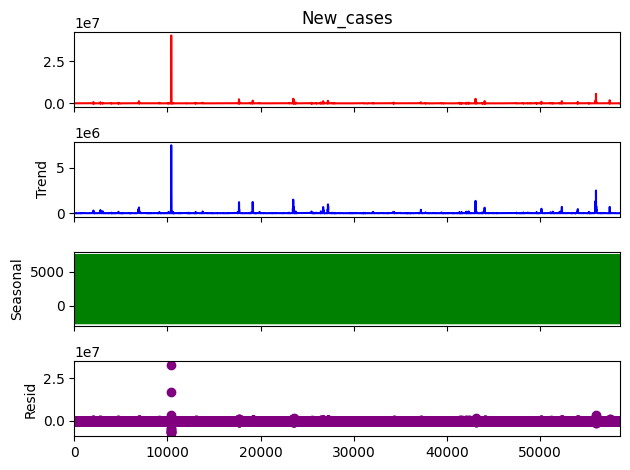

Mean Squared Error: 16467518617.385868


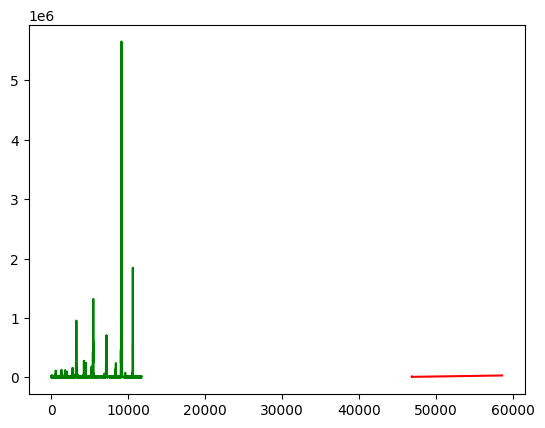

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose # Import the missing module
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Remove the leading space in the file path
df = pd.read_csv('/content/WHO COVID-19 cases.csv')

# Display the first few rows
df.head()

# Get information about the dataset
df.info()

# Generate descriptive statistics
df.describe()

# Fill missing values (if any)
df['New_cases'] = df['New_cases'].fillna(df['New_cases'].mean())

# Assuming 'df' is your DataFrame and 'New_cases' is the column with your time series data
result = seasonal_decompose(df['New_cases'], model='additive', period=12)  # or model='multiplicative'

# Access the components
result.trend
result.seasonal
result.resid

# Plot the decomposed components
fig = result.plot()
# Access the axes of the figure
ax = fig.axes
# Set the color of the lines in each subplot
colors = ['red', 'blue', 'green', 'purple']
for i, x in enumerate(ax):
  for line in x.get_lines():
    line.set_color(colors[i])
plt.show()

# Create seasonal differencing
df['New_cases_diff'] = df['New_cases'].diff(periods=12)  # Assuming monthly seasonality

train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Specify SARIMAX parameters (adjust based on EDA and model diagnostics)
model = SARIMAX(train_data['New_cases_diff'], order=(5,1,0), seasonal_order=(1,0,1,12))

# Fit the model
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Invert the differencing (if applicable)
predictions = predictions.cumsum() + train_data['New_cases'].iloc[-1]

# Calculate mean squared error
mse = mean_squared_error(test_data['New_cases'], predictions)
print("Mean Squared Error:", mse)

# Visualize actual vs. predicted values
plt.plot(np.arange(len(test_data)), test_data['New_cases'], color='green') # Access the 'New_cases' column of the DataFrame
plt.plot(predictions, color='red')
plt.show()

Mean Squared Error: 16467518617.385868
Root Mean Squared Error: 128325.82989167016
Mean Absolute Error: 27701.01755737882
Mean Absolute Percentage Error: 790.6664852043598


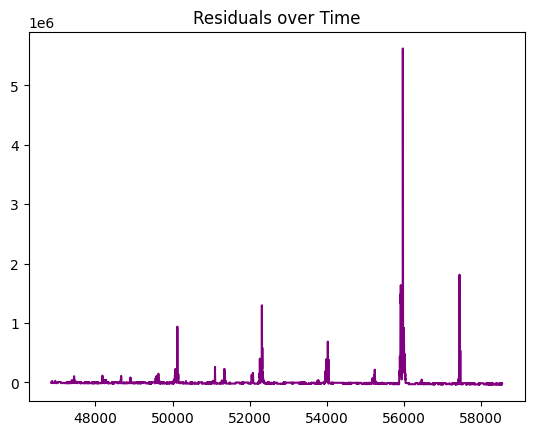

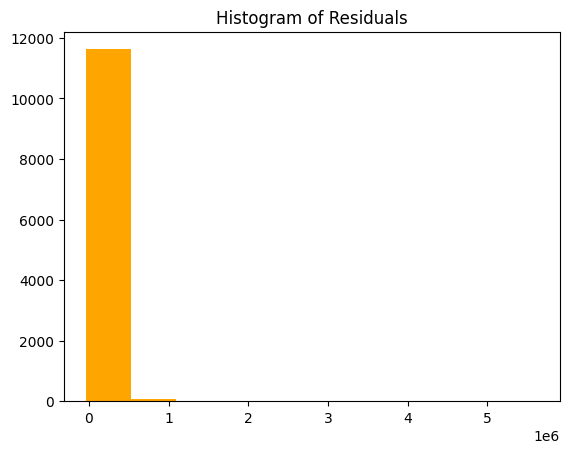

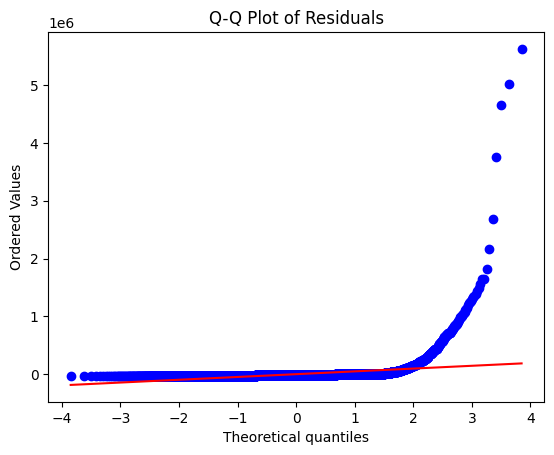

Ljung-Box Test Results:          lb_stat  lb_pvalue
10  40895.154251        0.0


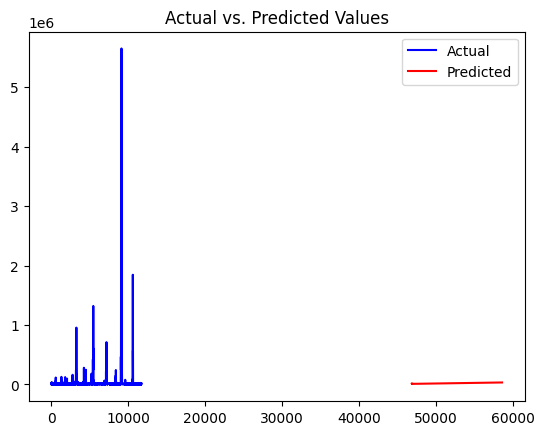

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as stats

# Load the data
df = pd.read_csv('/content/WHO COVID-19 cases.csv')

# Fill missing values
df['New_cases'] = df['New_cases'].fillna(df['New_cases'].mean())

# Create seasonal differencing
df['New_cases_diff'] = df['New_cases'].diff(periods=12)

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Fit the SARIMAX model
model = SARIMAX(train_data['New_cases_diff'], order=(5,1,0), seasonal_order=(1,0,1,12))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))
predictions = predictions.cumsum() + train_data['New_cases'].iloc[-1]

# Calculate evaluation metrics
mse = mean_squared_error(test_data['New_cases'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['New_cases'], predictions)
mape = mean_absolute_percentage_error(test_data['New_cases'], predictions)

# Print metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)

# Calculate residuals
residuals = test_data['New_cases'] - predictions

# Plot residuals over time
plt.plot(residuals, color='purple')
plt.title('Residuals over Time')
plt.show()

# Histogram of residuals
plt.hist(residuals, color='orange')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Ljung-Box test
ljung_box_result = acorr_ljungbox(residuals, lags=[10])
print("Ljung-Box Test Results:", ljung_box_result)

# Visualize actual vs. predicted values
plt.plot(np.arange(len(test_data)), test_data['New_cases'], color='blue', label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()